In [10]:
import numpy as np
import torch
import torch.nn.functional as F

In [11]:
#load the data
dataLR_dict = torch.load("serialized_data/dataLR.pt")
dataHR_dict = torch.load("serialized_data/dataHR.pt")

dataLR = dataLR_dict["data"]
dataHR = dataHR_dict["data"]

/tmp/ipykernel_6003/2217057475.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataLR_dict = torch.load("serialized_data/dataLR.pt")
/tmp/ipykernel_6003/2217057475.py:3:

In [8]:
import sys
sys.path.append('../downscaling_module')

In [9]:
import torch
from data_visualisation import plot_single, plot_bilinear_interpolation
from downscaling_module.data.datasets import ConvLSTMDataset

In [19]:
from downscaling_module.data.transforms import transforms
dataset = ConvLSTMDataset(dataLR, dataHR, transform=transforms)

Transforming with cutSequence
Transforming with bilinearInterpolation
Before interpolation:
LR: torch.Size([14, 501, 2, 1, 50]) HR: torch.Size([14, 501, 2, 5, 250])
Reshaped LR: torch.Size([7014, 2, 1, 50])
HR: torch.Size([14, 501, 2, 5, 250])
After interpolation:
LR resized: torch.Size([14, 501, 2, 5, 250]) HR: torch.Size([14, 501, 2, 5, 250])
Transforming with min_max_scale


In [22]:
lr, hr = dataset[:]
print(lr.shape, hr.shape)

torch.Size([14, 501, 2, 5, 250]) torch.Size([14, 501, 2, 5, 250])


In [23]:
torch.min(lr), torch.max(lr), torch.min(hr), torch.max(hr)

(tensor(-1.), tensor(1.), tensor(-1.), tensor(1.))

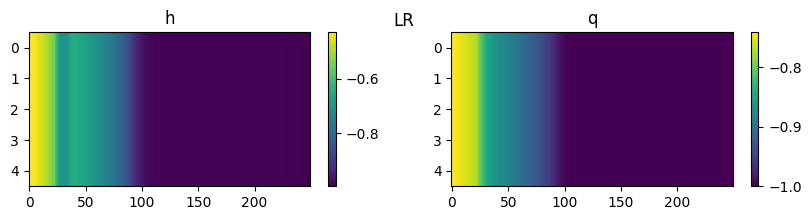

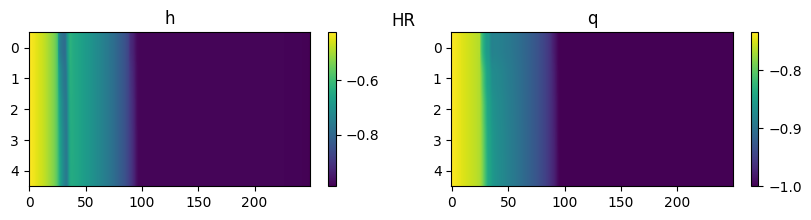

In [27]:
plot_single(lr[0, 100], title="LR")
plot_single(hr[0, 100], title="HR")